In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
ky_df = pd.read_csv("dataset.csv")

In [3]:
ky_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


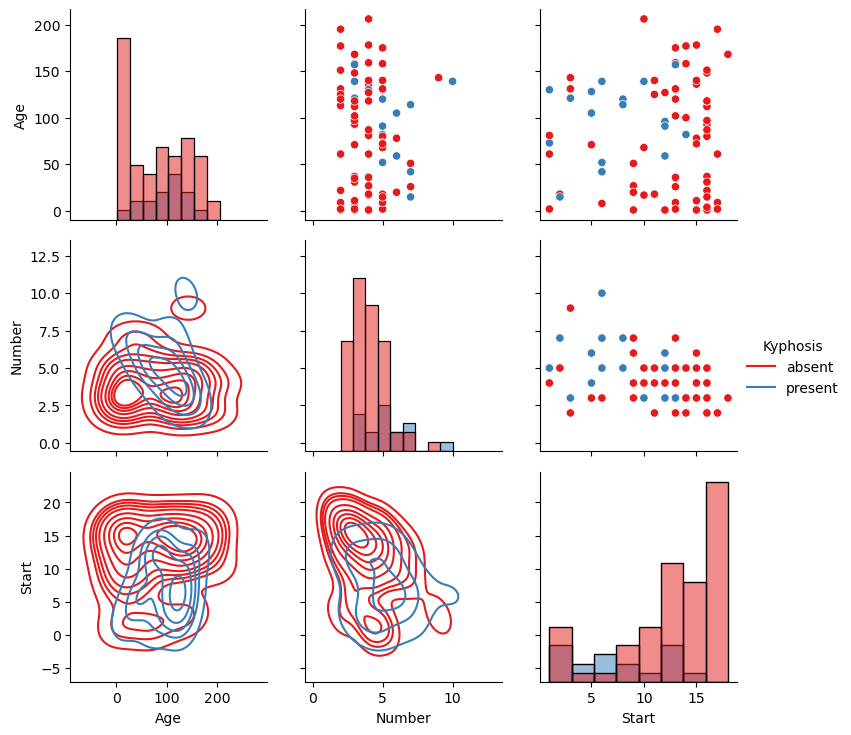

In [4]:
g = sns.PairGrid(ky_df, hue='Kyphosis', palette='Set1')

# Map the plots to the upper, lower, and diagonal subplots
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

# Add a legend
g.add_legend()

In [5]:
x = ky_df.drop('Kyphosis',axis=1)
y = ky_df['Kyphosis']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [6]:
Lr_model = LogisticRegression()

In [7]:
Lr_model.fit(x_train,y_train)

LogisticRegression()

In [8]:
pred = Lr_model.predict(x_test)

In [9]:
pred

array(['present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'present',
       'present'], dtype=object)

In [10]:
print(accuracy_score(pred,y_test))

0.84


In [12]:
import pickle 
filename='kd_detection_model.sav'
pickle.dump(Lr_model,open(filename,'wb'))